In [1]:
%matplotlib notebook
%matplotlib notebook  
%load_ext autoreload
%autoreload 2

## Igor's speedy method...

In [2]:
from __future__ import print_function, absolute_import
from IPython import display
import math
import matplotlib.pyplot as plt
import numpy as np

from multiple_traj_opt import (
    make_mto,
    MultipleTrajOpt,
    initial_conditions_Russ,
    initial_conditions_grid,
    initial_conditions_random,
    initial_conditions_random_all_dims,
)
from nn_system.networks import *

from igor import (
    do_igor_optimization,
    igor_traj_opt_serial,
    igor_traj_opt_parallel,
    igor_supervised_learning,
    igor_supervised_learning_cuda,
    visualize_intermediate_results,
)

## Applying to Pendulum

In [ ]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
# Remember to change this on the GPU reciever side too!!!
def kNetConstructor():
#     return MLP(2, 32, layer_norm=True, dropout=True)
     return MLP(2, 32, layer_norm=False, dropout=False)
#     return MLP(2, 2, layer_norm=False)
#     return FCBIG(2, 2)
#     return FCBIG(2, 2)
net = kNetConstructor()
expmt = "pendulum"
ic_list=None


# warm_start=None
# warm_start="linear"
# warm_start="random"
warm_start="target"
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=warm_start)

doing warm start
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
0 took 0.02s
10 took 0.02s
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result=SolutionResult.kIterationLimit
result

## Applying to Cartpole

doing warm start
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
0 took 10.11s
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kI

result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
310 took 7.68s
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
330 took 60.16s
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
290 took 25.59s
450 took 15.67s
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kInfea

result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
620 took 4.57s
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kIterationLimit
result=SolutionResult.kInfeasibleConstraints
810 took 8.34s
610 took 57.44s
result=SolutionResult.kInfeasibleConstraints
720 took 40.99s
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
780 took 16.82s
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownError
result=SolutionResult.kInfeasibleConstraints
840 took 5.60s
result=SolutionResult.kUnknownError
700 took 29.21s
result=SolutionResult.kUnknownError
result=SolutionResult.kIterationLimit
result=SolutionResult.kInfeasibleConstraints
result=SolutionResult.kUnknownEr

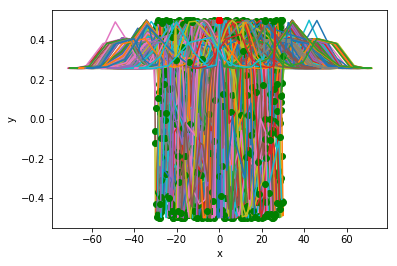

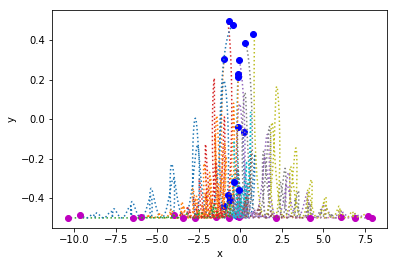

90 took 66.49s
30 took 68.49s
60 took 68.97s
120 took 69.99s
180 took 68.58s
210 took 70.59s
240 took 70.03s
150 took 73.55s
270 took 70.53s
0 took 77.92s
40 took 71.11s
70 took 71.00s
10 took 71.13s
130 took 69.14s
190 took 68.46s
100 took 71.17s
220 took 68.99s
250 took 69.11s
280 took 69.50s
160 took 68.19s
140 took 67.76s
200 took 68.16s
20 took 66.06s
110 took 70.11s
50 took 69.97s
230 took 67.55s
170 took 69.11s
80 took 70.37s
260 took 69.27s
300 took 67.77s
330 took 67.36s
360 took 67.11s
390 took 68.78s
420 took 68.03s
480 took 69.53s
510 took 69.45s
540 took 68.39s
450 took 72.72s
310 took 70.52s
430 took 69.09s
340 took 69.91s
370 took 71.73s
400 took 70.92s
490 took 68.24s
460 took 70.60s
550 took 69.18s
520 took 73.62s
350 took 68.58s
290 took 68.80s
530 took 66.51s
410 took 68.48s
320 took 70.58s
380 took 71.84s
440 took 71.21s
470 took 68.21s
500 took 69.48s
560 took 71.26s
570 took 68.00s
600 took 68.78s
630 took 69.85s
660 took 70.81s
690 took 70.27s
720 took 69.43s
750

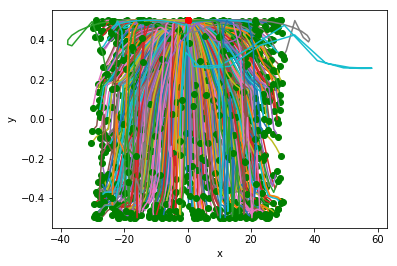

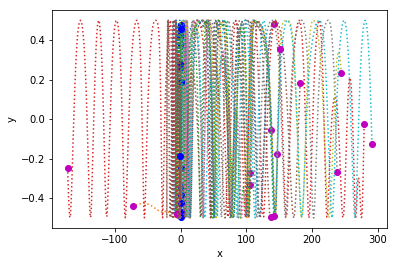

30 took 68.27s
150 took 65.97s
90 took 68.18s
0 took 70.22s
120 took 68.38s
240 took 67.28s
180 took 69.29s
210 took 69.62s
270 took 70.97s
60 took 76.48s
100 took 66.27s
10 took 70.04s
250 took 68.85s
40 took 71.85s
70 took 70.79s
220 took 69.70s
130 took 76.76s
280 took 68.72s
190 took 75.86s
160 took 75.18s
170 took 67.97s
140 took 69.65s
200 took 68.20s
80 took 68.70s
230 took 68.97s
50 took 70.24s
110 took 77.04s
260 took 76.75s
20 took 77.50s
390 took 67.49s
360 took 70.78s
300 took 76.04s
450 took 69.38s
480 took 68.79s
330 took 77.13s
420 took 73.04s
510 took 70.83s
540 took 70.28s


In [ ]:
%matplotlib inline
# First let's just see what Igor Optimization does on pendulum
def kNetConstructor():
    return MLP(4, 128, layer_norm=False)
net = kNetConstructor()
expmt = "cartpole"
ic_list=None

# warm_start=None
warm_start="linear"
# warm_start="random"
# warm_start="target"
do_igor_optimization(net, kNetConstructor, expmt, ic_list, naive=False, warm_start=warm_start)

## Applying to to Pendulum

In [ ]:
# First let's just see what Igor Optimization does on pendulum
net = FCBIG(2, 128)
expmt = "pendulum"
num_trajectories = # TODO: have some default for pendulum and cartpole
ic_list = initial_conditions_grid(num_trajectories, ) # TODO: have some default for pendulum and cartpole
do_igor_optimization(net, expmt, ic_list, warm_start=None, num_trajectories=num_trajectories)

In [ ]:
# Then let's experiment with the different minibatch schemes.
# First let's find a good batch size
ic_gen    = # Expmt default
n_iters   = 
inner_fn  = 
network   = 
traj_bank = []
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method1
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method2
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method3
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method4
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method5
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Method6
warm_start_method = 
mini_batch_and_warm_start(ic_gen, n_iters, inner_fn, network, warm_start_method, traj_bank)

In [ ]:
# Now with adding dropout to favorite warm-starting scheme above


## Applying to to Cartpole

## Compare best method to VI solutions?

<IPython.core.display.Javascript object>


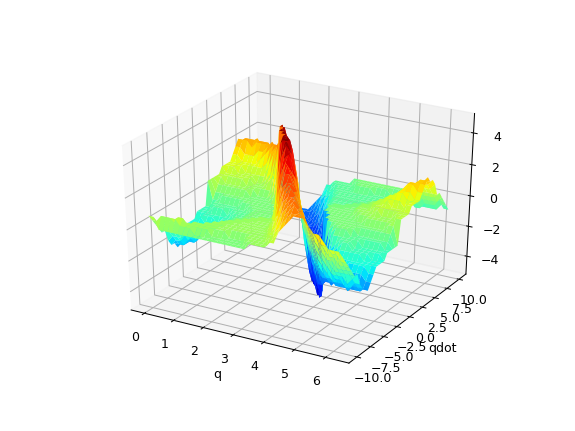

<IPython.core.display.Javascript object>


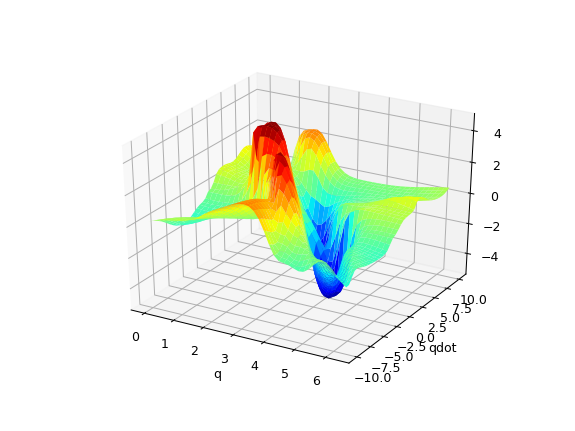

In [211]:
from traj.vi_utils import (
    load_vi_policy,
    vis_vi_policy,
    vis_nn_policy_like_vi_policy
)
vi_policy = load_vi_policy('good', "pendulum")
vis_vi_policy(vi_policy)
vis_nn_policy_like_vi_policy(net, vi_policy)

using_ics=  False
knot_MSE: [13.43466199], traj_MSE: [50.41605436]
[(80000, 2), (80000, 1), (80000, 1)]


<IPython.core.display.Javascript object>


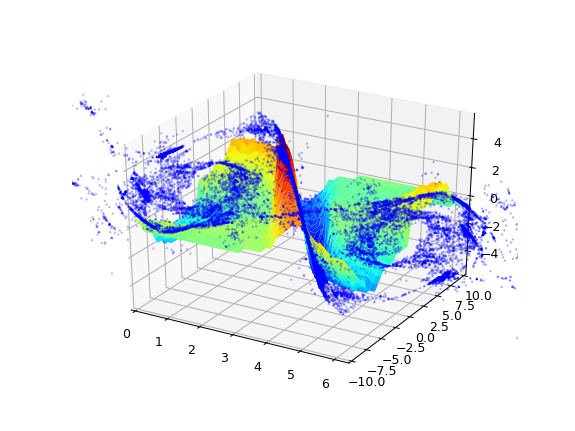

In [201]:
from traj.vi_utils import (graph_vi_policy_vs_traj_knot_scatter)

# ics_or_dircols = ics
ics_or_dircols = dircols
graph_vi_policy_vs_traj_knot_scatter(vi_policy, ics_or_dircols, 
                                     combine_vi_policy_and_scatter=True,
                                     plot_residual=False)